In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import json.decoder

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving MY_DATA.csv to MY_DATA.csv


In [ ]:
df = pd.read_csv("MY_DATA.csv")

In [ ]:
# Afficher les premières lignes pour vérifier
df.head()


,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian.e,schoolsup.e,famsup.e,paid.e,activities.e,nursery.e,higher.e,internet.e,romantic.e,result
0,1,17,2,3,1,4,0,5,4,2,...,1,1,0,1,1,0,1,1,0,1
1,2,18,3,4,4,2,1,5,3,5,...,0,0,1,0,1,1,1,0,0,0
2,3,15,4,1,3,2,3,2,2,1,...,0,1,1,0,1,0,1,0,0,0
3,4,17,1,0,4,2,2,2,4,5,...,1,0,1,0,0,0,1,0,0,0
4,5,17,2,4,3,4,3,5,4,5,...,2,1,1,0,0,1,0,1,1,0


Analyse exploraoire :


Infos du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            5852 non-null   int64
 1   age           5852 non-null   int64
 2   Medu          5852 non-null   int64
 3   Fedu          5852 non-null   int64
 4   traveltime    5852 non-null   int64
 5   studytime     5852 non-null   int64
 6   failures      5852 non-null   int64
 7   famrel        5852 non-null   int64
 8   freetime      5852 non-null   int64
 9   goout         5852 non-null   int64
 10  Dalc          5852 non-null   int64
 11  Walc          5852 non-null   int64
 12  health        5852 non-null   int64
 13  absences      5852 non-null   int64
 14  G3            5852 non-null   int64
 15  sex.e         5852 non-null   int64
 16  famsize.e     5852 non-null   int64
 17  Pstatus.e     5852 non-null   int64
 18  Mjob.e        5852 non-null   int64
 19  Fjob.e 

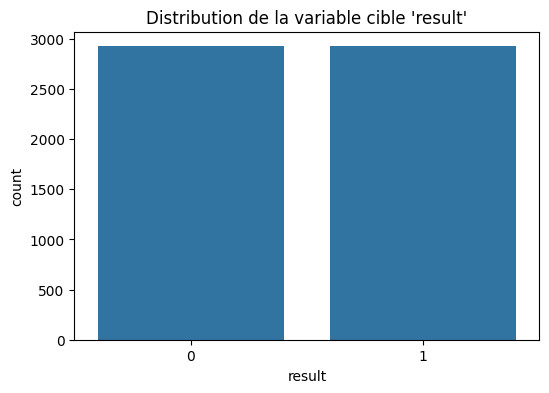

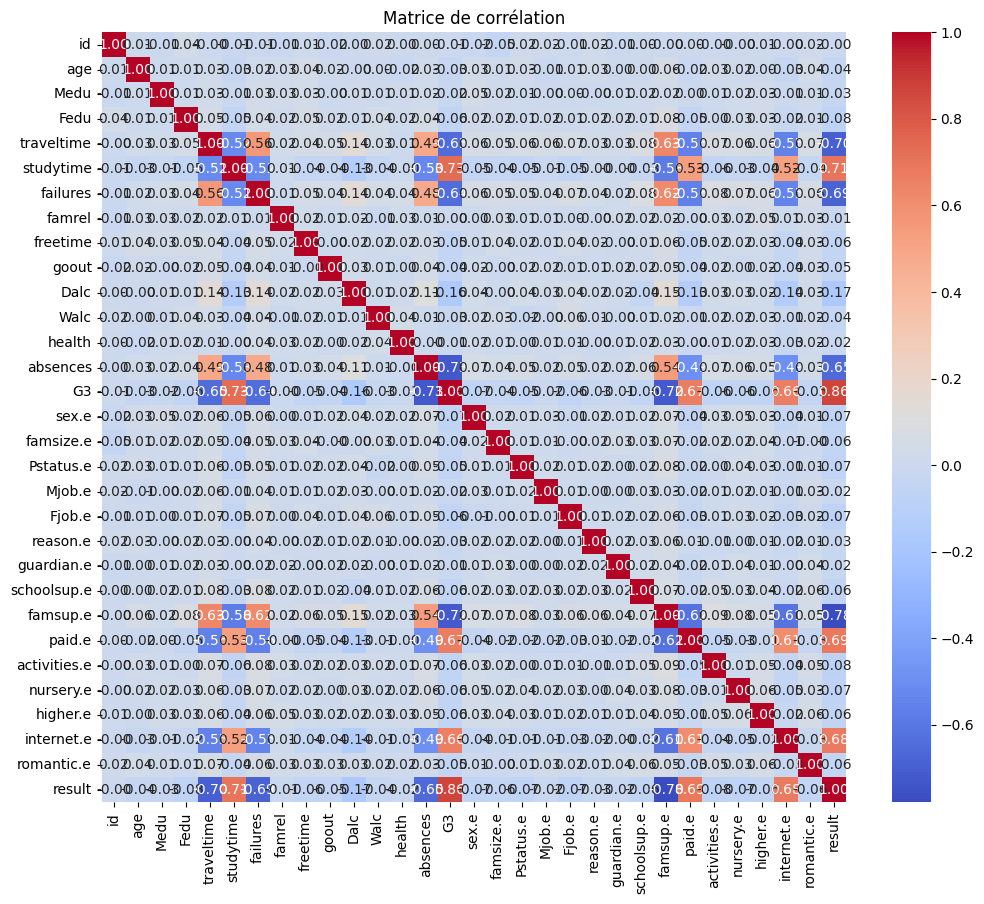

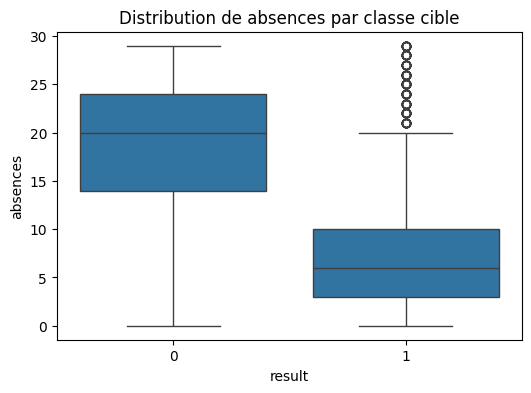

In [ ]:
# Informations générales
print("\nInfos du dataset :")
print(df.info())

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

# Distribution de la variable cible
plt.figure(figsize=(6,4))
sns.countplot(x="result", data=df)
plt.title("Distribution de la variable cible 'result'")
plt.show()

# Heatmap des corrélations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Boxplots de quelques variables clés (à adapter selon ton dataset)
features_to_plot = ["G1", "G2", "absences"]  # Remplace par des colonnes pertinentes de ton jeu de données
for col in features_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="result", y=col, data=df)
        plt.title(f"Distribution de {col} par classe cible")
        plt.show()

Pre traitement : remplacer les valeurs manquantes.
separation des Features (x) et Targets (y)

In [ ]:
X = df.drop(columns=["result"])
X = X.drop(columns=["G3"])
df.replace('U', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Convertit tout en numérique
y = df["result"]  # Target variable

In [ ]:
# Séparer les données numériques et catégorielles
numerical_features = ['age', 'Medu', 'Fedu', 'famrel','studytime','traveltime', 'failures','freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
categorical_features = ['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'romantic','reason','guardian','schoolsup','famsup','paid','activities','higher','internet']
print(numerical_features)
print(categorical_features)

['age', 'Medu', 'Fedu', 'famrel', 'studytime', 'traveltime', 'failures', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'romantic', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet']


In [ ]:
print(df[numerical_features].describe())

               age         Medu         Fedu       famrel   studytime  \
count  5852.000000  5852.000000  5852.000000  5852.000000  5852.00000   
mean     16.434040     1.919173     1.962919     2.962919     3.88380   
std       1.105257     1.387419     1.374435     1.386321     2.52389   
min      15.000000     0.000000     0.000000     1.000000     1.00000   
25%      15.000000     1.000000     1.000000     2.000000     2.00000   
50%      16.000000     2.000000     2.000000     3.000000     3.00000   
75%      17.000000     3.000000     3.000000     4.000000     5.00000   
max      18.000000     4.000000     4.000000     5.000000    10.00000   

        traveltime     failures     freetime        goout         Dalc  \
count  5852.000000  5852.000000  5852.000000  5852.000000  5852.000000   
mean      2.427033     1.536056     2.935919     2.907553     3.061517   
std       1.103578     1.141456     1.391613     1.401893     1.413358   
min       1.000000     0.000000     1.000000  

In [ ]:
# Vérifier les doublons dans toutes les colonnes
doublons = df[df.duplicated()]

# Afficher le nombre de doublons
print(f"Nombre de doublons : {doublons.shape[0]}")

Nombre de doublons : 10


Separation des donnes

In [ ]:
print("--- Informations sur les données catégorielles ---")
print(df[categorical_features].describe())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalisation des donnes

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy mesures

In [ ]:
def print_metrics(y_test, y_pred, model_name):
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Precision:", precision_score(y_test, y_pred, average='weighted'))
    print(f"{model_name} Recall:", recall_score(y_test, y_pred, average='weighted'))
    print(f"{model_name} F1-score:", f1_score(y_test, y_pred, average='weighted'))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



    if len(np.unique(y_test)) == 2:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"{model_name} ROC AUC Score:", roc_auc)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f}')



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
   

KNN Best Params: {'n_neighbors': 40}
KNN Accuracy: 0.9632792485055508
KNN Precision: 0.9655914867106453
KNN Recall: 0.9632792485055508
KNN F1-score: 0.9632506877870931
KNN Confusion Matrix:
 [[577   1]
 [ 42 551]]
KNN ROC AUC Score: 0.9637217946398874


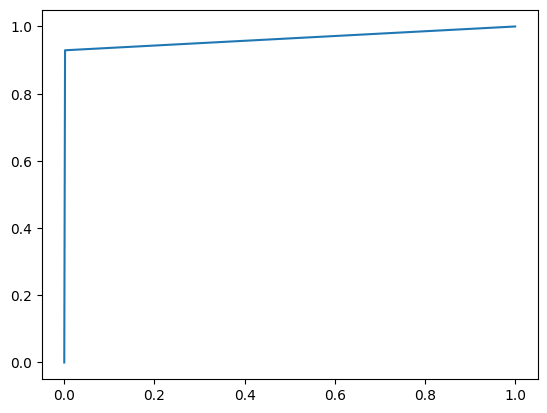

In [ ]:
# ---------------------- KNN MODEL ----------------------
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [3, 5, 7, 9,40,50,60,70,80,90,100,110,120,140,160,180,200,500,1000,2000,3000,4000,5000]}
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
y_pred_knn = grid_knn.best_estimator_.predict(X_test_scaled)
print("KNN Best Params:", grid_knn.best_params_)
print_metrics(y_test, y_pred_knn, "KNN")



SVM Best Params: {'C': 1, 'kernel': 'rbf'}
SVM Accuracy: 0.9795046968403074
SVM Precision: 0.9798700273223966
SVM Recall: 0.9795046968403074
SVM F1-score: 0.9795044576955548
SVM Confusion Matrix:
 [[574   4]
 [ 20 573]]
SVM ROC AUC Score: 0.9796763859794488


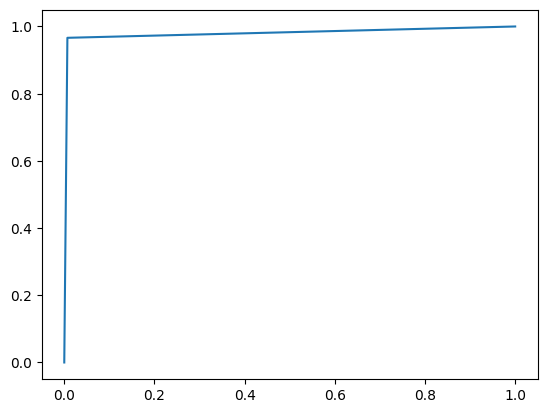

In [ ]:
# ---------------------- SVM MODEL ----------------------
svm = SVC()
param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)
y_pred_svm = grid_svm.best_estimator_.predict(X_test_scaled)
print("SVM Best Params:", grid_svm.best_params_)
print_metrics(y_test, y_pred_svm, "SVM")


Logistic Regression Best Params: {'C': 10}
Logistic Regression Accuracy: 0.9760888129803587
Logistic Regression Precision: 0.9760888129803587
Logistic Regression Recall: 0.9760888129803587
Logistic Regression F1-score: 0.9760888129803587
Logistic Regression Confusion Matrix:
 [[564  14]
 [ 14 579]]
Logistic Regression ROC AUC Score: 0.9760848888707352


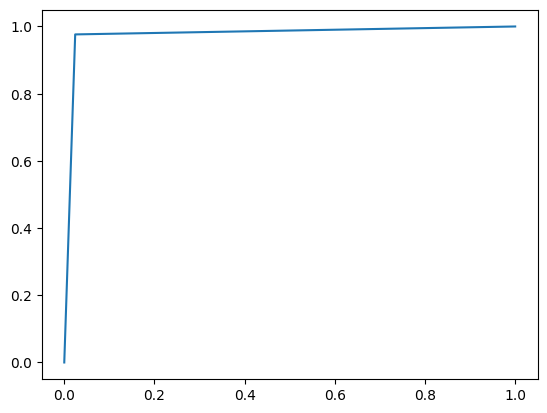

In [ ]:
# ---------------------- LOGISTIC REGRESSION ----------------------
log_reg = LogisticRegression()
param_grid = {"C": [0.1, 1, 10]}
grid_logreg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train_scaled, y_train)
y_pred_logreg = grid_logreg.best_estimator_.predict(X_test_scaled)
print("Logistic Regression Best Params:", grid_logreg.best_params_)
print_metrics(y_test, y_pred_logreg, "Logistic Regression")

Decision Tree Best Params: {'max_depth': 5}
Decision Tree Accuracy: 0.9837745516652434
Decision Tree Precision: 0.9839492181459089
Decision Tree Recall: 0.9837745516652434
Decision Tree F1-score: 0.9837750723089939
Decision Tree Confusion Matrix:
 [[574   4]
 [ 15 578]]
Decision Tree ROC AUC Score: 0.9838922375814725


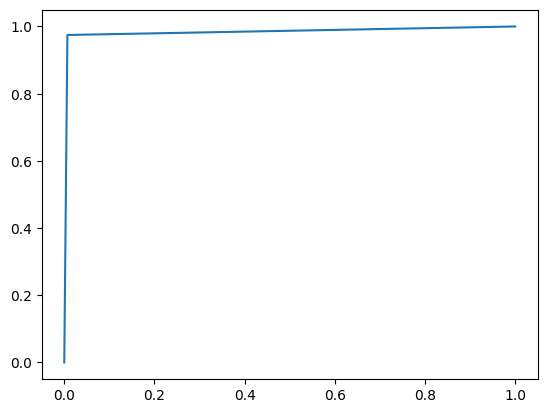

In [ ]:
# ---------------------- DECISION TREE ----------------------
dt = DecisionTreeClassifier()
param_grid = {"max_depth": [3, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print("Decision Tree Best Params:", grid_dt.best_params_)
print_metrics(y_test, y_pred_dt, "Decision Tree")

Random Forest Best Params: {'n_estimators': 200}
Random Forest Accuracy: 0.9880444064901793
Random Forest Precision: 0.9880495793535177
Random Forest Recall: 0.9880444064901793
Random Forest F1-score: 0.9880441099880558
Random Forest Confusion Matrix:
 [[570   8]
 [  6 587]]
Random Forest ROC AUC Score: 0.9880205628526582


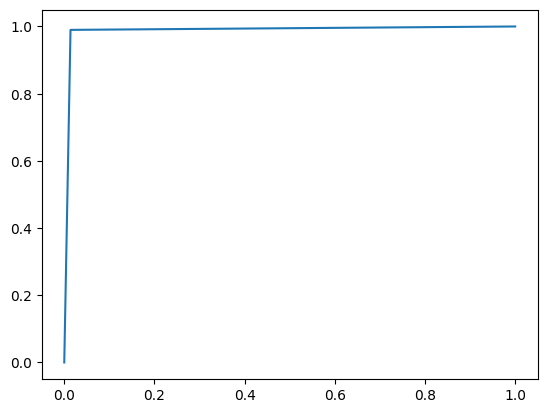

In [ ]:
# ---------------------- RANDOM FOREST ----------------------
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
param_grid = {"n_estimators": [50, 100, 200]}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print("Random Forest Best Params:", grid_rf.best_params_)
print_metrics(y_test, y_pred_rf, "Random Forest")




In [ ]:
# Afficher les prédictions individuelles
results_df = X_test.copy()
results_df["Vraie_valeur"] = y_test.values
results_df["Prédiction"] = y_pred_svm
print(results_df.head(10))  # Affiche les 10 premières lignes


        id  age  Medu  Fedu  traveltime  studytime  failures  famrel  \
3286  3287   16     3     2           4          2         2       3   
2876  2877   16     1     4           3          1         3       1   
2996  2997   17     2     2           3          1         2       2   
23      24   18     4     1           4          2         3       1   
1074  1075   15     0     0           4          2         2       2   
3431  3432   16     3     4           2          4         1       3   
1175  1176   17     2     1           1          5         0       3   
2463  2464   16     0     4           4          3         2       5   
1520  1521   16     0     3           2          3         3       1   
783    784   18     4     2           2          1         3       3   

      freetime  goout  ...  schoolsup.e  famsup.e  paid.e  activities.e  \
3286         3      2  ...            1         1       0             0   
2876         3      1  ...            0         1       0

In [ ]:
# Copier les données de test
results_rf = X_test.copy()

results_rf["Vraie_valeur"] = y_test.values

results_rf["Prédiction"] = y_pred_rf

print(results_rf.head(10))


        id  age  Medu  Fedu  traveltime  studytime  failures  famrel  \
3286  3287   16     3     2           4          2         2       3   
2876  2877   16     1     4           3          1         3       1   
2996  2997   17     2     2           3          1         2       2   
23      24   18     4     1           4          2         3       1   
1074  1075   15     0     0           4          2         2       2   
3431  3432   16     3     4           2          4         1       3   
1175  1176   17     2     1           1          5         0       3   
2463  2464   16     0     4           4          3         2       5   
1520  1521   16     0     3           2          3         3       1   
783    784   18     4     2           2          1         3       3   

      freetime  goout  ...  schoolsup.e  famsup.e  paid.e  activities.e  \
3286         3      2  ...            1         1       0             0   
2876         3      1  ...            0         1       0

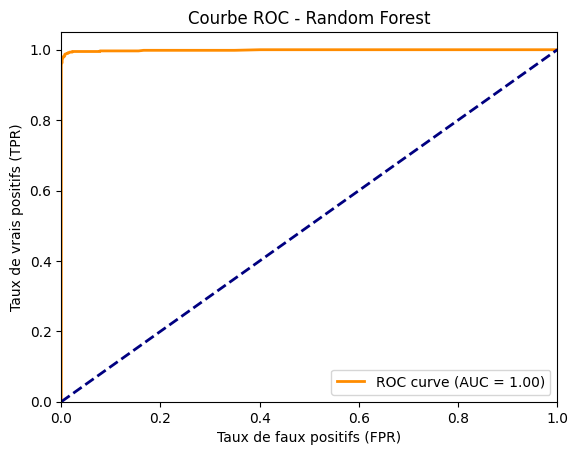

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul des probabilités de prédiction (nécessaire pour la courbe ROC)
y_prob_rf = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]

# Calcul des points de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Calcul de l'aire sous la courbe (AUC)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour référence
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


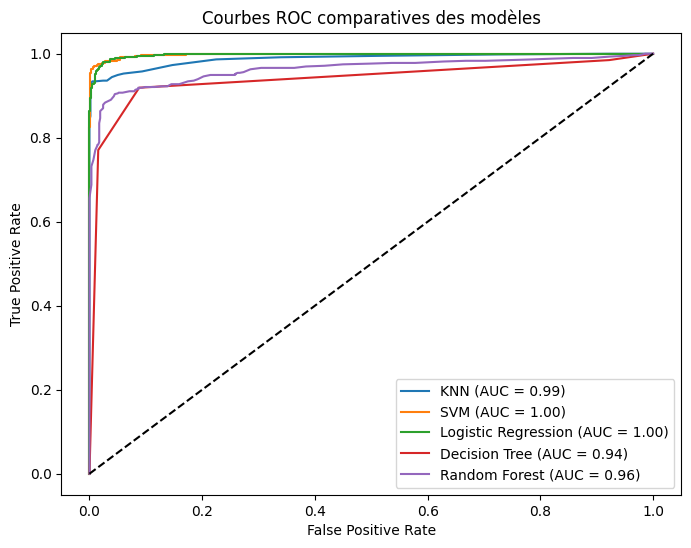

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# On prépare un dictionnaire des modèles avec leurs prédicteurs optimaux
models = {
    "KNN": grid_knn.best_estimator_,
    "SVM": grid_svm.best_estimator_,
    "Logistic Regression": grid_logreg.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": grid_rf.best_estimator_
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Certains modèles (ex: SVM avec kernel linéaire sans probability=True) n'ont pas predict_proba
    # On utilise donc decision_function si predict_proba n'est pas dispo
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:,1]  # probabilité de la classe positive
    else:
        y_scores = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # ligne diagonale aléatoire
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC comparatives des modèles")
plt.legend()
plt.show()


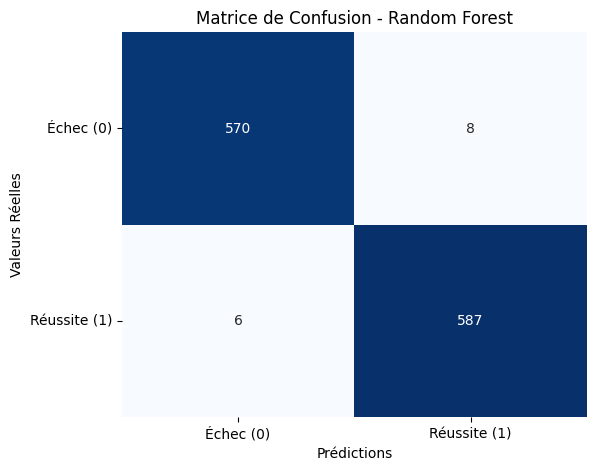

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)

# Création de la heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Ajout des titres et labels
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.xticks(ticks=[0.5, 1.5], labels=['Échec (0)', 'Réussite (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Échec (0)', 'Réussite (1)'], rotation=0)

plt.show()


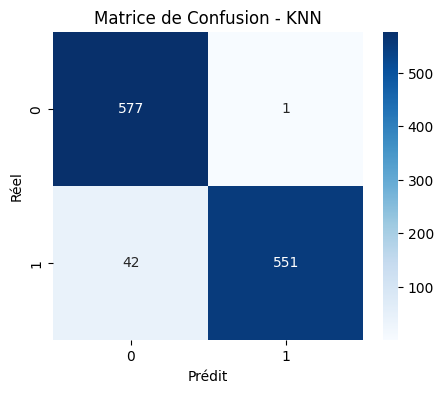

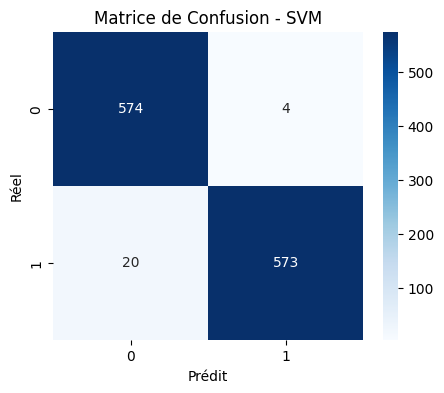

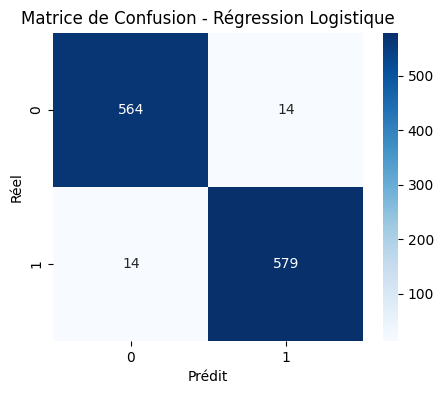

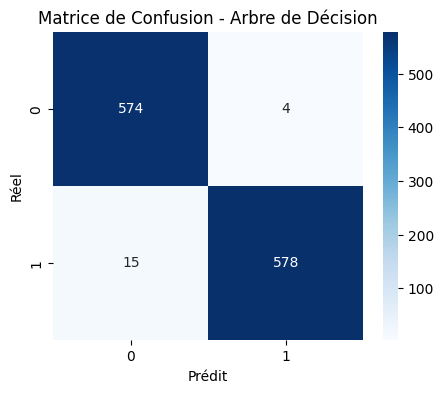

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()

# Affichage des matrices de confusion
plot_conf_matrix(y_test, y_pred_knn, "KNN")
plot_conf_matrix(y_test, y_pred_svm, "SVM")
plot_conf_matrix(y_test, y_pred_logreg, "Régression Logistique")
plot_conf_matrix(y_test, y_pred_dt, "Arbre de Décision")
